#### 00. Load packages

import os
gpu = 1
available_devices = os.environ['CUDA_VISIBLE_DEVICES'].split(',')
os.environ['CUDA_VISIBLE_DEVICES'] = available_devices[gpu]

In [19]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


#### 01. Set constants

In [23]:
data_file = '../01.data/PeopleFootfall_fromMay.xlsx'

columns = ['time',
           'counter_name',
           'events']

#### 02. Data

In [24]:
sheet_names = pd.ExcelFile(data_file).sheet_names

In [25]:
len(sheet_names)

92

In [26]:
data = {}

for sheet in sheet_names:
    
    data_day = pd.read_excel(data_file,sheetname=sheet)
    
    if data_day.shape[0]>0:
        
        colnames = data_day.columns
        date_variable = colnames[0]
        data_day.columns = columns

        weekday,date,year = date_variable.strip().split(',')
        month,day = date.strip().split(' ')
        year = year.strip()
        
        entry_date = month+'-'+day+'-'+year
        data_day['weekday'] = weekday
        data_day['date'] = entry_date
        
        
        data_day.fillna(method='ffill', inplace=True)
        data_day = data_day.pivot_table(columns='counter_name',
                                        index=['date','weekday','time'],
                                        values='events')
        data_day.reset_index(inplace=True)
        data_day = data_day[data_day.time!='Total']
        data_day['timestamp'] = pd.to_datetime(data_day.date+' '+data_day.time)
        
        del data_day['Gates']
        del data_day['time']
        del data_day['date']
        data[entry_date] = data_day
        
df = pd.concat(data, axis=0)
df.sort_values('timestamp',inplace=True)
df.reset_index(inplace=True,drop=True)

In [27]:
df.to_csv('../01.data/PeopleFootfall_combined.txt',sep='|',index=False)

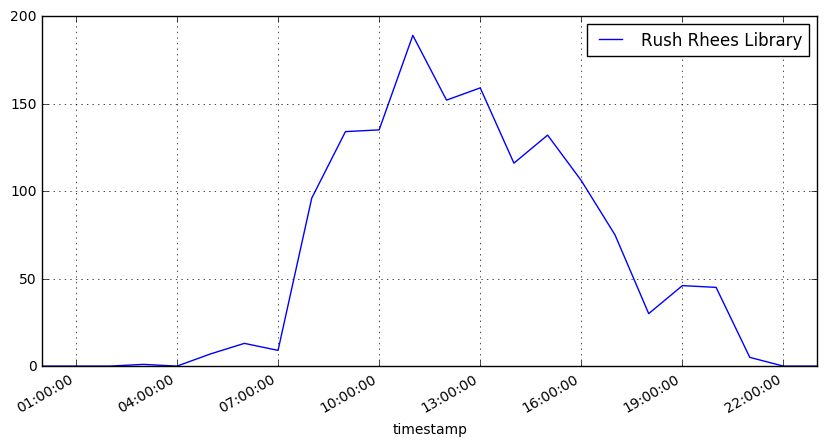

In [28]:
data_day = data['May-22-2017']

data_day.plot(x='timestamp',
              y='Rush Rhees Library',
              figsize=(10,5),
              grid=True);

plt.savefig('../04.visualization/sample_day_may_22_2017.png',dpi=150)

In [29]:
pd.melt(df,
        id_vars=['timestamp','weekday'],
        value_vars=['DouglassBridge.Counter',
                    'FriedlanderLobby.Counter',
                    'GleasonEntrance.Counter',
                    'GleasonStacks.Counter',
                    'Rush Rhees Library']).to_csv('../01.data/PeopleFootfall_long.txt',
                                                  sep='|',
                                                  index=False)

In [ ]:
data_plot = df[
   ['DouglassBridge.Counter',
    'FriedlanderLobby.Counter',
    'GleasonEntrance.Counter',
    'GleasonStacks.Counter',
    'Rush Rhees Library']
  ]
data_plot.loc[:,'date'] = df.timestamp.dt.date.values
data_plot.loc[:,'hour'] = df.timestamp.dt.hour.values

data_plot = data_plot.pivot_table(index='date',
                                  columns='hour',
                                  aggfunc='sum')

In [31]:
entrance = ['DouglassBridge.Counter',
            'FriedlanderLobby.Counter',
            'GleasonEntrance.Counter',
            'GleasonStacks.Counter',
            'Rush Rhees Library']

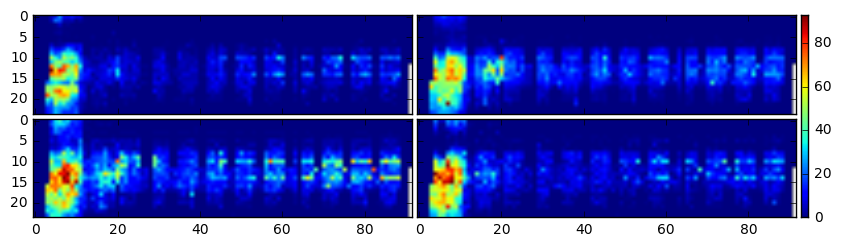

In [32]:
from mpl_toolkits.axes_grid1 import AxesGrid
vals = [data_plot[entry] for entry in entrance[:4]]

fig = plt.figure(figsize=(10,10))

grid = AxesGrid(fig, 111,
                nrows_ncols=(2, 2),
                share_all=True,
                axes_pad=0.05,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                cbar_size='1%'
                )

for entry, ax in zip(entrance[:4],grid):
    im = ax.imshow(data_plot[entry].transpose())

grid.cbar_axes[0].colorbar(im)

for cax in grid.cbar_axes:
    cax.toggle_label(True)

In [19]:
data_plot.head()

counter_name DouglassBridge.Counter                                            \
hour                             0    1    2    3    4    5    6     7     8    
date                                                                            
2017-05-01                      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
2017-05-02                      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
2017-05-03                      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
2017-05-04                      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
2017-05-05                      9.0  8.0  0.0  0.0  0.0  0.0  0.0  11.0  31.0   

counter_name        ...   Rush Rhees Library                              \
hour            9   ...                   14     15     16     17     18   
date                ...                                                    
2017-05-01     0.0  ...                  0.0    0.0    0.0    0.0    0.0   
2017-05-02     0.0  ...                  0.0    0.0    0.0    0.0    0.0   
2017-05-03     0.0  ...                  0.0    0.0    0.0    0.0    0.0   
2017-05-04     0.0  ...                  0.0    0.0  344.0  471.0  344.0   
2017-05-05    51.0  ...                530.0  529.0  405.0  371.0  339.0   

counter_name                                     
hour             19     20     21     22     23  
date                                             
2017-05-01      0.0    0.0    0.0    0.0    0.0  
2017-05-02      0.0    0.0    0.0    0.0    0.0  
2017-05-03      0.0    0.0    0.0    0.0    0.0  
2017-05-04    376.0  301.0  235.0  209.0  140.0  
2017-05-05    334.0  283.0  239.0  201.0  184.0  

[5 rows x 120 columns]

In [20]:
data_original = df
data_original.index = data_original.timestamp

In [21]:
data_original.columns[1:6]

Index([u'DouglassBridge.Counter', u'FriedlanderLobby.Counter',
       u'GleasonEntrance.Counter', u'GleasonStacks.Counter',
       u'Rush Rhees Library'],
      dtype='object', name=u'counter_name')

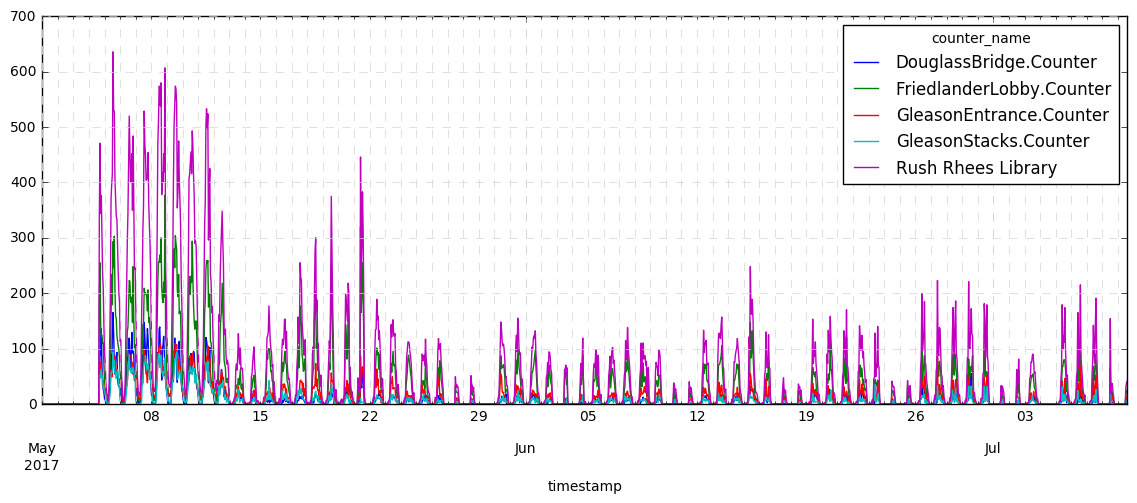

In [22]:
data_original[data_original.columns[1:7]].plot(figsize=(14,5),grid=True);

plt.grid(b=True, which='major', color='lightgrey', linestyle='--')
plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation,Dropout
from keras.layers import Dense,LSTM,Conv1D

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [24]:
data_original.columns

Index([                 u'weekday',   u'DouglassBridge.Counter',
       u'FriedlanderLobby.Counter',  u'GleasonEntrance.Counter',
          u'GleasonStacks.Counter',       u'Rush Rhees Library',
                      u'timestamp'],
      dtype='object', name=u'counter_name')

### $$First\ Model$$

In [25]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [26]:
dataset = np.array([[row] 
           for row in data_original['Rush Rhees Library'].values])
dataset = dataset.astype('float32')

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)



train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

(1119, 552)


In [28]:
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

##### Define Model

In [29]:
run = '00.initial'

In [56]:
from keras.optimizers import adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import EarlyStopping, LearningRateScheduler

tb = TensorBoard(
        log_dir='../04.visualization/tensorboard/kaggle_'+run+'/',
        write_graph=True,
        write_images=True
    )

mc = ModelCheckpoint(filepath = '../05.model/'+run+'.h5',
                     save_best_only = True)

ec = EarlyStopping(monitor='val_loss',
                   min_delta=0.00001,
                   verbose=1,
                   patience=25,
                   mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=5,
                              min_lr=0.000000000001)

In [ ]:
with tf.device('/gpu:1'):
    
    # create and fit the LSTM network
    model = Sequential()
    
    model.add(LSTM(50, input_shape=(None, look_back)))
    
    model.add(Dense(1))
    
    model.compile(loss='mse',
                  optimizer=adam(lr=0.001))
    loss_history = model.fit(x=trainX,
                              y=trainY, 
                              epochs=500, 
                              batch_size=1,
                              validation_split=0.1,
                              verbose=1,
                              callbacks=[tb,mc,ec,reduce_lr]
                             )
    
loss_df = pd.DataFrame(loss_history.history)

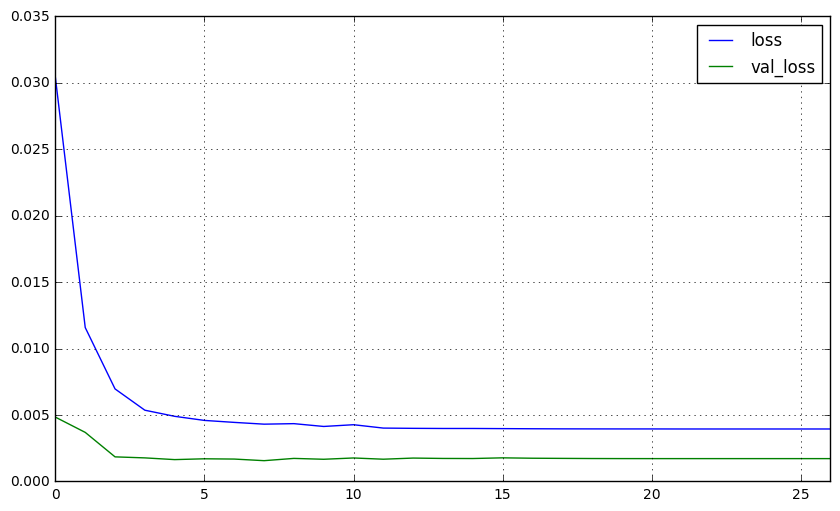

In [60]:
loss_df[['loss','val_loss']].plot(grid=True,
                                  figsize=(6,3));

In [30]:
from keras.models import load_model

In [ ]:
model = load_model('../05.model/'+run+'.h5')

In [ ]:
model.summary()

In [61]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 38.81 RMSE
Test Score: 31.11 RMSE


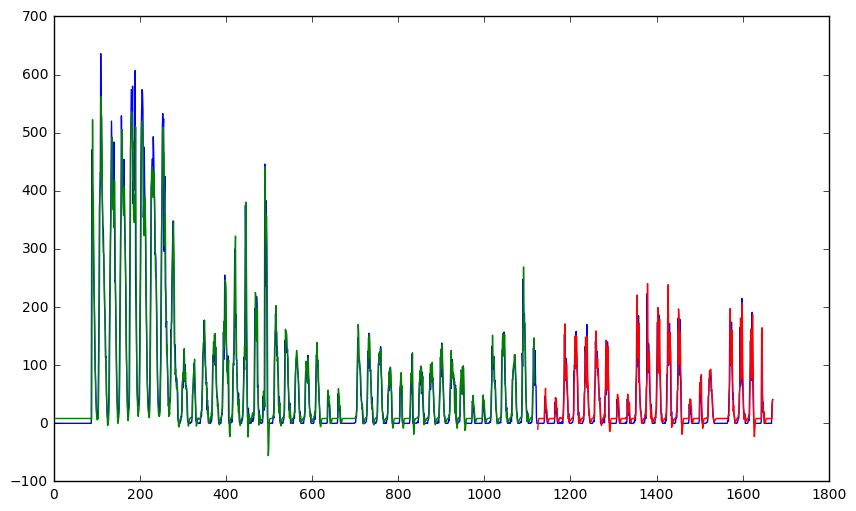

In [62]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot);

In [63]:
outputY = np.append(trainPredict,testPredict)
actualY = np.append(scaler.inverse_transform(dataset)[look_back:len(trainPredict)+look_back],
                    scaler.inverse_transform(dataset)[len(trainPredict)+(look_back*2)+1:len(dataset)-1])

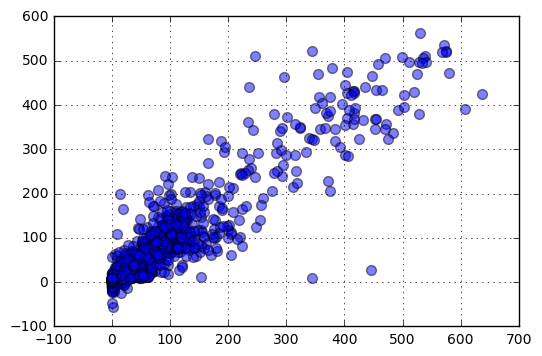

In [64]:
plt.scatter(actualY,outputY,alpha=0.5,s=50,c='blue');
plt.grid();

### $$Stacked\ LSTM$$

In [398]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))


with tf.device('/gpu:1'):
    
    # create and fit the LSTM network
    batch_size = 1
    model = Sequential()
    model.add(LSTM(25, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(50, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(100):
        model.fit(trainX, 
                  trainY, 
                  epochs=1, 
                  batch_size=batch_size, 
                  verbose=0, 
                  shuffle=False)
        model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Train Score: 45.93 RMSE
Test Score: 29.47 RMSE


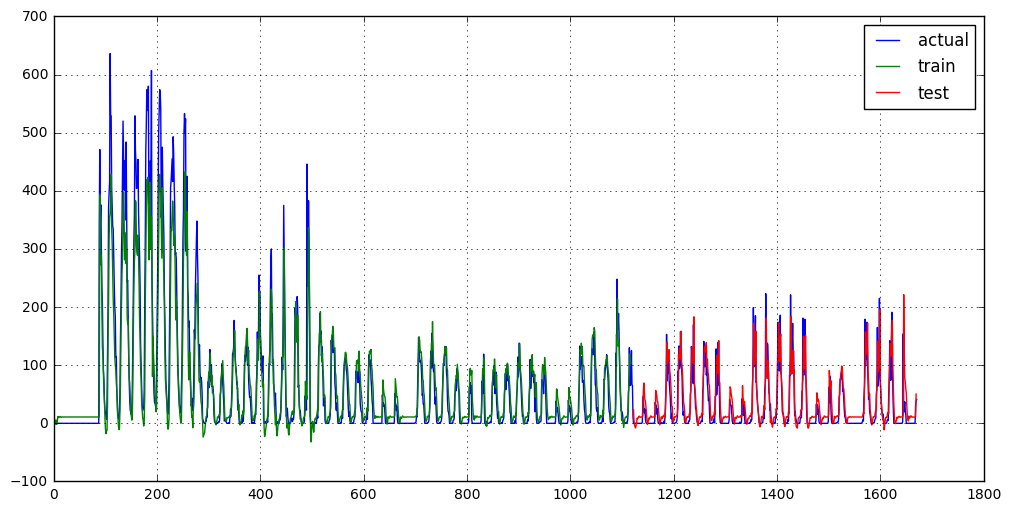

In [402]:
# plot baseline and predictions

plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot);
plt.grid();
plt.legend(['actual','train','test']);

## $$With\ Weekday$$

In [170]:
def create_dataset_withWeekday(dataset,df_weekdays, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        
        values = dataset[i:(i+look_back), 0]
        current_day = df_weekdays[i]
        a = np.append(df_weekdays[i],
                      values)
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return numpy.array(dataX), numpy.array(dataY)

In [198]:
from keras.utils import to_categorical

df_weekdays = to_categorical(df.timestamp.dt.weekday.values)

dataset = np.array([[row] 
           for row in data_original['Rush Rhees Library'].values])
dataset = dataset.astype('float32')

In [199]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)



train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print(len(train), len(test))

(1119, 552)


In [200]:
look_back = 1
trainX, trainY = create_dataset_withWeekday(train,df_weekdays, look_back)
testX, testY = create_dataset_withWeekday(test,df_weekdays, look_back)


trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

##### Define Model

In [566]:
run = '00.initial'

In [567]:
import keras.backend as K
from keras.optimizers import adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import EarlyStopping, LearningRateScheduler

tb = TensorBoard(
        log_dir='../04.visualization/tensorboard/kaggle_'+run+'/',
        write_graph=True,
        write_images=True
    )

mc = ModelCheckpoint(filepath = '../05.model/'+run+'.h5',
                     save_best_only = True)

ec = EarlyStopping(monitor='loss',
                   verbose=1,
                   patience=25,
                   mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='loss',
                              factor=0.1,
                              patience=3,
                              min_lr=10**-10)

In [568]:
from keras.utils import to_categorical
from keras.losses import mse,msle

df_weekdays = to_categorical(df.timestamp.dt.weekday.values)

dataset = np.array([[row] 
           for row in data_original['Rush Rhees Library'].values])
dataset = dataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)



train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print(len(train), len(test))

(1119, 552)


In [569]:
look_back = 3
epochs  = 150
seq_len = 12



trainX, trainY = create_dataset_withWeekday(train,df_weekdays, look_back)
testX, testY = create_dataset_withWeekday(test,df_weekdays, look_back)


trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



print('> Loading data... ')

X_train, y_train, X_test, y_test = trainX,trainY,testX,testY

> Loading data... 


In [570]:
from keras.layers import Flatten

In [571]:
K.clear_session()

with tf.device('/gpu:0'):
    
    # create and fit the LSTM network
    
    model2 = Sequential()
    

    model2.add(Dense(32,
                      input_shape=(1, look_back+7)
                    ))
    model2.add(Activation('relu'))
    
    
    model2.add(LSTM(units=256
                   ))
    
    
    model2.add(Dense(512,
                      input_shape=(1, look_back+7)
                    ))
    model2.add(Activation('relu'))
    
    
    model2.add(Dense(1024))
    model2.add(Activation('relu'))
    
    model2.add(Dense(units=1))
    
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 32)             352       
_________________________________________________________________
activation_1 (Activation)    (None, 1, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               295936    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
activation_3 (Activation)    (None, 1024)              0         
__________

In [572]:
with tf.device('/gpu:0'):
    
    model2.compile(optimizer=adam(10**-5),loss='mse')
 
    loss_history = model2.fit(
                            X_train,
                            y_train,
                            batch_size=75,
                            epochs=2500,
                            validation_split=0.1,
                            callbacks=[tb,mc,ec,reduce_lr]
    )

loss_df = pd.DataFrame(loss_history.history)

Train on 1003 samples, validate on 112 samples
Epoch 1/2500
1003/1003 [==============================] - 0s - loss: 0.0542 - val_loss: 0.0120
Epoch 2/2500
1003/1003 [==============================] - 0s - loss: 0.0518 - val_loss: 0.0109
Epoch 3/2500
1003/1003 [==============================] - 0s - loss: 0.0495 - val_loss: 0.0099
Epoch 4/2500
1003/1003 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0090
Epoch 5/2500
1003/1003 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0083
Epoch 6/2500
1003/1003 [==============================] - 0s - loss: 0.0435 - val_loss: 0.0077
Epoch 7/2500
1003/1003 [==============================] - 0s - loss: 0.0416 - val_loss: 0.0072
Epoch 8/2500
1003/1003 [==============================] - 0s - loss: 0.0399 - val_loss: 0.0069
Epoch 9/2500
1003/1003 [==============================] - 0s - loss: 0.0382 - val_loss: 0.0067
Epoch 10/2500
1003/1003 [==============================] - 0s - loss: 0.0367 - val_loss: 0.0067
Ep

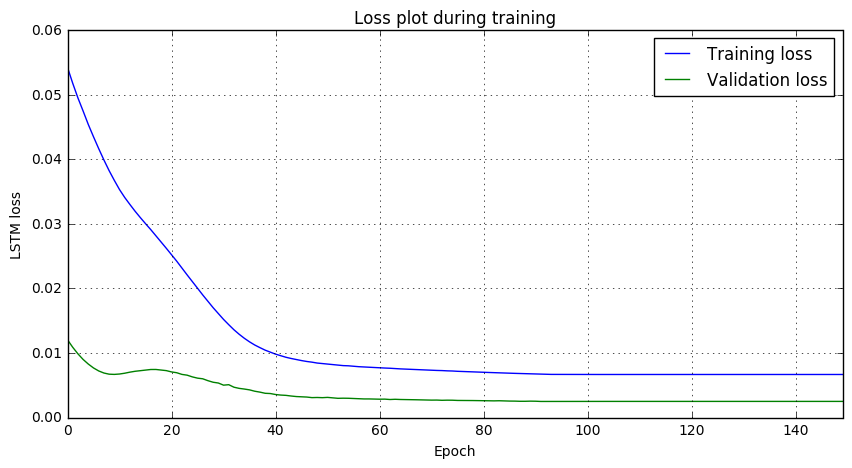

In [685]:
loss_df[['loss','val_loss']].plot(grid=True,
                                  figsize=(10,5));

plt.title('Loss plot during training')
plt.ylabel('LSTM loss')
plt.xlabel('Epoch')
plt.legend(['Training loss','Validation loss']);
plt.savefig('../04.visualization/model_lossPlot.png',dpi=250)

In [574]:
# make predictions

trainPredict = model2.predict(X_train)
testPredict = model2.predict(X_test)

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(np.expand_dims(y_train,-1))

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(np.expand_dims(y_test,-1))

# calculate root mean squared error

trainScore = np.sqrt(mean_squared_error(trainY,trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = np.sqrt(mean_squared_error(testY,testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 50.25 RMSE
Test Score: 30.90 RMSE


In [641]:
ma_error = mean_absolute_error(trainY,trainPredict),mean_absolute_error(testY,testPredict)
ms_error = mean_squared_error(trainY,trainPredict),mean_squared_error(testY,testPredict)

In [646]:
ma_error

(29.119261, 19.56785)

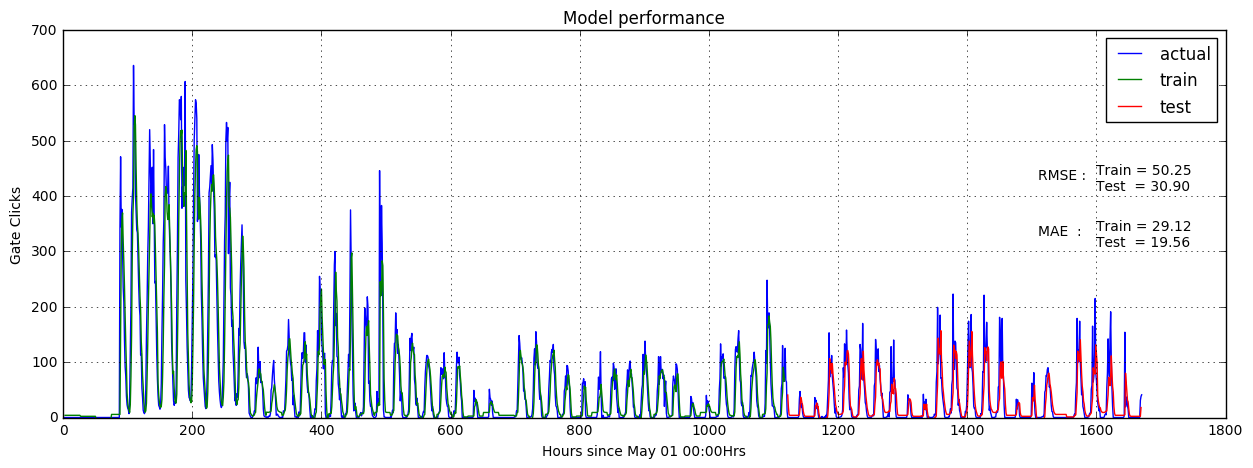

In [680]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot-5)
plt.plot(testPredictPlot-5)

plt.grid();
plt.ylim((0,700))
plt.text(1510,430,'RMSE : ')
plt.text(1600,410,'Train = 50.25 \nTest  = 30.90')
plt.text(1510,330,'MAE  : ')
plt.text(1600,310,'Train = 29.12 \nTest  = 19.56')

plt.ylabel('Gate Clicks')
plt.xlabel('Hours since May 01 00:00Hrs')
plt.title('Model performance')
plt.legend(['actual','train','test']);
plt.savefig('../04.visualization/model_results.png',dpi=750)